In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("master.csv")
print(df.columns)
df.sample(1)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
7051,Cyprus,2013,male,15-24 years,8,62893,12.72,Cyprus2013,0.85,"24,084,572,491",29624,Millenials


In [3]:
data = df[df.country == 'Brazil']
print(data.shape)
data.sample(1)

(372, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4270,Brazil,1993,male,25-34 years,1183,12975409,9.12,Brazil1993,NaN,"437,798,577,640",3136,Boomers


# Analyzing data from world

In [4]:
countries = df.country.unique().tolist()
countries[:5]

['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba']

In [5]:
suicide_no = []
for c in countries:
    s = 0 
    for i in range(0, len(df.country)):
        if(c==df.country[i]):
            s += df.iloc[i]['suicides_no']
    suicide_no.append(s)

In [6]:
print(countries[0])
print(suicide_no[0])

Albania
1970


In [7]:
d = {'country' : countries, 'total_suicides' : suicide_no}
suicide_world = pd.DataFrame(data=d)
indexes = suicide_world['total_suicides'].sort_values(ascending=False)[:10].index.tolist()
top_suicide_no = []
top_countries = []
for i in indexes:
    top_countries.append(suicide_world.iloc[i].country)
    top_suicide_no.append(suicide_world.iloc[i]['total_suicides'])
    
print(top_countries)
print(top_suicide_no)

['Russian Federation', 'United States', 'Japan', 'France', 'Ukraine', 'Germany', 'Republic of Korea', 'Brazil', 'Poland', 'United Kingdom']
[1209742, 1034013, 806902, 329127, 319950, 291262, 261730, 226613, 139098, 136805]


# Plotting number of suicides by country
- The top 10 countries with the highest suicide rate

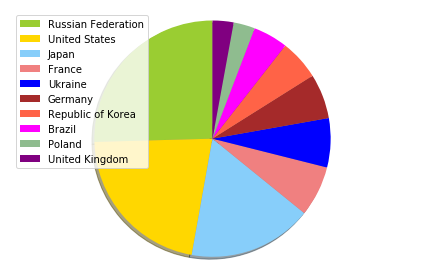

In [8]:
labels = top_countries
sizes = [38.4, 40.6, 20.7, 10.3]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'blue', 'brown', 'tomato', 'magenta', 'darkseagreen', 'purple']
patches, texts = plt.pie(top_suicide_no, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

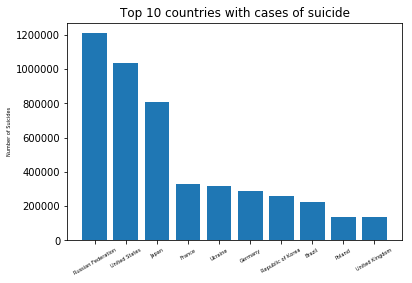

In [9]:
index = np.arange(len(top_countries))
plt.bar(top_countries, top_suicide_no)
#plt.xlabel('Countries', fontsize=5)
plt.ylabel('Number of Suicides', fontsize=5)
plt.xticks(index, top_countries, fontsize=5, rotation=30)
plt.title('Top 10 countries with cases of suicide')
plt.show()

# Analyzing data from Brazil
- 8th most suicidal country in the world

In [23]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,372.000000,372.000000,3.720000e+02,372.000000,120.000000,372.000000
mean,2000.000000,609.174731,1.305401e+07,5.846022,0.694900,6091.483871
std,8.956318,652.567097,6.655806e+06,5.623846,0.061539,3711.626223
min,1985.000000,25.000000,6.556210e+05,0.150000,0.576000,1898.000000
25%,1992.000000,99.500000,8.193910e+06,2.152500,0.648000,3310.000000
50%,2000.000000,348.000000,1.478517e+07,2.800000,0.719500,4490.000000
75%,2008.000000,939.000000,1.749273e+07,9.855000,0.746000,9283.000000
max,2015.000000,3238.000000,2.846186e+07,23.920000,0.755000,14245.000000


In [10]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [11]:
female = data.groupby(by=['sex', 'age'])['suicides_no'].sum()[:6]
male = data.groupby(by=['sex', 'age'])['suicides_no'].sum()[6:]
f = []
m = []
fn = []
mn = []
for i in range(6):
    f.append(female.index[i][1].split(' ')[0])
    m.append(male.index[i][1].split(' ')[0])
    fn.append(female[i])
    mn.append(male[i])
print(f)
print(m)

['15-24', '25-34', '35-54', '5-14', '55-74', '75+']
['15-24', '25-34', '35-54', '5-14', '55-74', '75+']


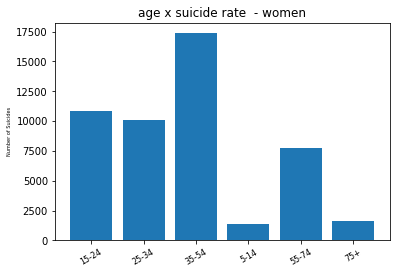

In [12]:
index = np.arange(len(f))
plt.bar(f, fn)
#plt.xlabel('Countries', fontsize=5)
plt.ylabel('Number of Suicides', fontsize=5)
plt.xticks(index, f, fontsize=8, rotation=30)
plt.title('age x suicide rate  - women')
plt.show()

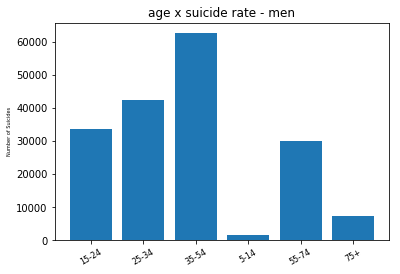

In [13]:
index = np.arange(len(m))
plt.bar(m, mn)
#plt.xlabel('Countries', fontsize=5)
plt.ylabel('Number of Suicides', fontsize=5)
plt.xticks(index, f, fontsize=8, rotation=30)
plt.title('age x suicide rate - men')
plt.show()

In [14]:
print('total female: ', sum(fn))
print('total male: ', sum(mn))

total female:  49015
total male:  177598


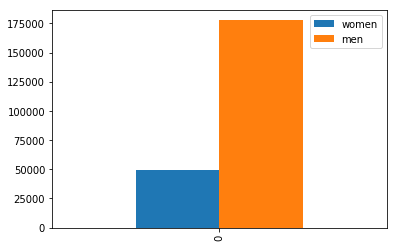

In [15]:
d = {'women' : [sum(fn)], 'men' : [sum(mn)]}
perSex = pd.DataFrame(data=d)
perSex.plot.bar()

In [16]:
year = data.groupby(by=['country-year'])['suicides_no'].sum().index.tolist()
suicide_no = data.groupby(by=['country-year'])['suicides_no'].sum().values.tolist()

In [17]:
year_ = [d[6:] for d in year]

print(year_[:5])
print(suicide_no[:5])

['1985', '1986', '1987', '1988', '1989']
[4228, 4271, 4672, 4466, 4463]


In [18]:
corr_year = data.pivot_table(index='year',
                                  values='suicides_no', aggfunc=np.median)
corr_year

,suicides_no
year,
1985,274.5
1986,294.0
1987,278.5
1988,273.5
1989,254.0
1990,277.0
1991,284.5
1992,272.5
1993,297.5


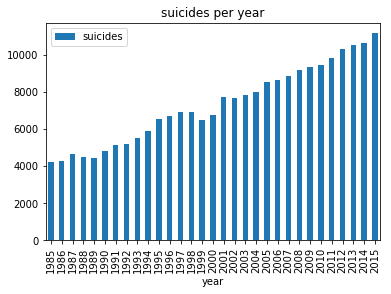

In [19]:
d = {'year' : year_, 'suicides' : suicide_no}
perYear = pd.DataFrame(data=d)
perYear.plot.bar(x='year',y='suicides')
plt.title("suicides per year")
plt.show()

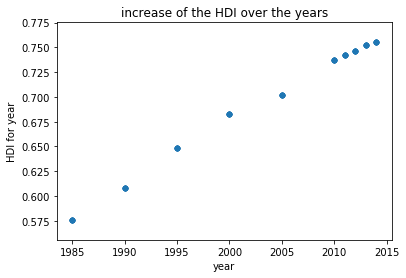

In [20]:
data.plot.scatter(x='year',y='HDI for year')
plt.title("increase of the HDI over the years")
plt.show()

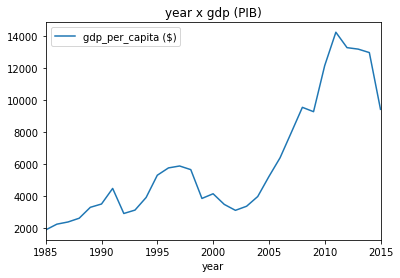

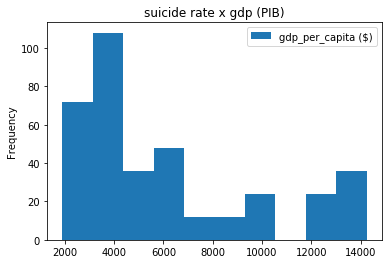

In [21]:
data.plot.line(x='year',y='gdp_per_capita ($)')
plt.title("year x gdp (PIB)")
data.plot.hist(x='suicides_no',y='gdp_per_capita ($)')
plt.title("suicide rate x gdp (PIB)")
plt.show()

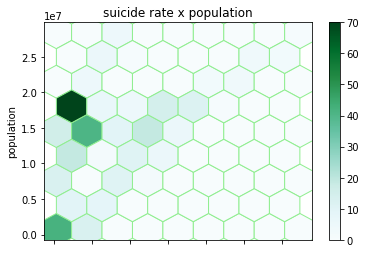

In [22]:
data.plot.hexbin(x='suicides_no',y='population', gridsize=8, color='lightgreen')
plt.title("suicide rate x population")
plt.show()